In [3]:
import stumpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [8]:
pd.options.display.float_format = "{:,.4f}".format
np.set_printoptions(suppress=True)

In [9]:
connection = sqlite3.connect('../data/GBPUSD.db')
df = pd.read_sql_query("SELECT * FROM d_2010", connection, parse_dates=True)

In [10]:
df.head()

,pTime,pOpen,pHigh,pLow,pClose,vcOpen,vcHigh,vcLow,vcClose
0,1262304000,1.6176,1.6176,1.6160,1.6170,3.0161,3.0161,-0.8268,1.5204
1,1262305800,1.6170,1.6170,1.6168,1.6170,1.4076,1.5172,1.0513,1.3254
2,1262307600,1.6170,1.6170,1.6168,1.6169,1.0475,1.2609,0.7426,0.8950
3,1262309400,1.6169,1.6170,1.6168,1.6170,1.2147,1.5805,0.9222,1.3976
4,1262311200,1.6169,1.6171,1.6168,1.6170,1.2407,1.9355,0.9367,1.5012


In [11]:
data = df[['pTime', 'pOpen', 'pHigh', 'pLow', 'pClose']]

In [12]:
index = data['pTime']
data = data.drop('pTime', axis=1)
data.index = index

In [13]:
data.head()

,pOpen,pHigh,pLow,pClose
pTime,,,,
1262304000,1.6176,1.6176,1.6160,1.6170
1262305800,1.6170,1.6170,1.6168,1.6170
1262307600,1.6170,1.6170,1.6168,1.6169
1262309400,1.6169,1.6170,1.6168,1.6170
1262311200,1.6169,1.6171,1.6168,1.6170


In [15]:
timeseries = data.mean(axis=1)

In [16]:
timeseries.head()

pTime
1262304000   1.6170
1262305800   1.6169
1262307600   1.6169
1262309400   1.6169
1262311200   1.6169
dtype: float64

In [21]:
timeseries_1k = timeseries[:1000]

In [22]:
timeseries_1k

pTime
1262304000   1.6170
1262305800   1.6169
1262307600   1.6169
1262309400   1.6169
1262311200   1.6169
              ...  
1264786200   1.6045
1264788000   1.6025
1264789800   1.6015
1264791600   1.6010
1264793400   1.6008
Length: 1000, dtype: float64

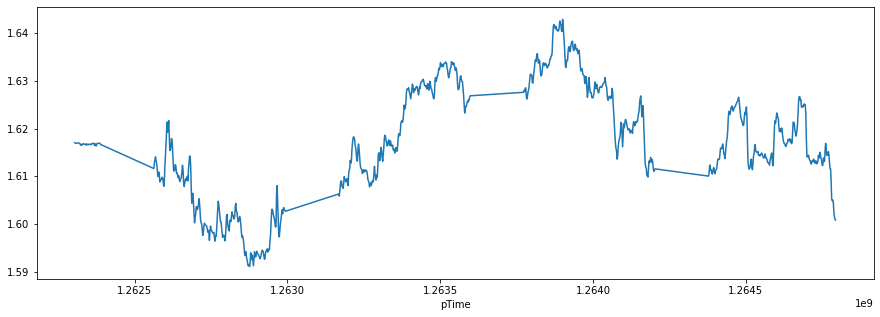

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=timeseries_1k.values, x=timeseries_1k.index);

In [269]:
m = 10
mp = stumpy.stump(timeseries, m)

In [311]:
mp[:5]

array([[0.8362026850105405, 839, -1, 839],
       [0.614817987791426, 10916, -1, 10916],
       [0.4136527385424679, 5387, -1, 5387],
       [0.49055111896549514, 10233, -1, 10233],
       [0.7191189627685832, 8896, 0, 8896]], dtype=object)

In [270]:
timeseries.shape

(12522,)

In [271]:
len(mp)

12513

In [301]:
motif_index = np.argsort(mp[:, 0])[10]

In [302]:
motif_index

3111

In [303]:
nearest_neighbor_idx = mp[motif_index, 1]

In [304]:
nearest_neighbor_idx

3375

In [305]:
pattern_1 = timeseries[nearest_neighbor_idx:].head(30)

In [306]:
pattern_1.head()

pTime
1270805400   1.5296
1270807200   1.5315
1270809000   1.5343
1270810800   1.5364
1270812600   1.5371
dtype: float64

In [307]:
pattern_2 = timeseries[motif_index:].head(30)

In [308]:
pattern_2.index = pattern_1.index

In [309]:
pattern_2.head()

pTime
1270805400   1.5271
1270807200   1.5276
1270809000   1.5285
1270810800   1.5291
1270812600   1.5293
dtype: float64

<AxesSubplot:xlabel='pTime'>

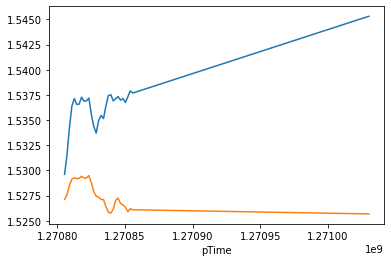

In [310]:
sns.lineplot(data=pattern_1)
sns.lineplot(data=pattern_2)